In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import gzip

sns.set_theme()

statDir = "D:/stats/"

def readData(file):
    dtypes={
        'nodes':float,
        'prune0': float,'prune1': float,'prune2': float,'prune3': float,'prune4': float,'prune5': float,'prune6': float,'prune7': float,'prune8': float,'prune9': float
    }

    path = statDir + file
    if (file.endswith(".gz")):
        fd = gzip.open(path, 'rb')
    else:
        fd = open(path, 'rb')

    data = pd.read_csv(fd, dtype=dtypes)

    recovered = data[data["result"] == "recovery"].sort_values("size")
    range = np.arange(0, 11264, 1024)
    recovered["bsize"] = pd.cut(recovered["size"], range, labels=range[1:])

    return recovered


Prepare data

In [ ]:

recovered_old = readData("benchmark-stats-2025-04-29-flattener-amb-filter-rascal-0-10240maxamb-1.txt.gz")
#recovered = stats.readData("benchmark-stats-2025-04-19-parent-amb-3-rascal-0-10240.txt.gz")
#recovered = stats.readData("benchmark-stats-2025-04-23-parent-amb-2-rascal-0-10240.txt.gz")
#recovered = stats.readData("benchmark-stats-2025-04-23-parent-amb-any-3-rascal-0-10240.txt.gz")

# Read data at different pruning levels
maxSkips = [5,10,15]
recovered = []
for maxSkip in maxSkips:
    df = readData("benchmark-stats-2025-05-10-skip-window-rascal-0-10240skip-" + str(maxSkip) + "-2048.txt.gz")
    #df = readData("benchmark-stats-2025-05-06-flattener-amb-filter-rascal-0-5120maxamb-" + str(pruneLevel) + ".txt.gz")
    recovered.append(df)


maxSkip stats: 5
count    885872.000000
mean         52.667929
std          41.371108
min           0.000000
25%          22.000000
50%          44.000000
75%          75.000000
max        1992.000000
Name: duration, dtype: float64
maxSkip stats: 10
count    884424.000000
mean         51.859977
std          39.542354
min           0.000000
25%          22.000000
50%          44.000000
75%          74.000000
max        1371.000000
Name: duration, dtype: float64
maxSkip stats: 15
count    883550.000000
mean         52.496522
std          39.480945
min           0.000000
25%          23.000000
50%          45.000000
75%          75.000000
max        1196.000000
Name: duration, dtype: float64


### Visualize the recovery duration per file size bucket.

count    885872.000000
mean         52.667929
std          41.371108
min           0.000000
25%          22.000000
50%          44.000000
75%          75.000000
max        1992.000000
Name: duration, dtype: float64


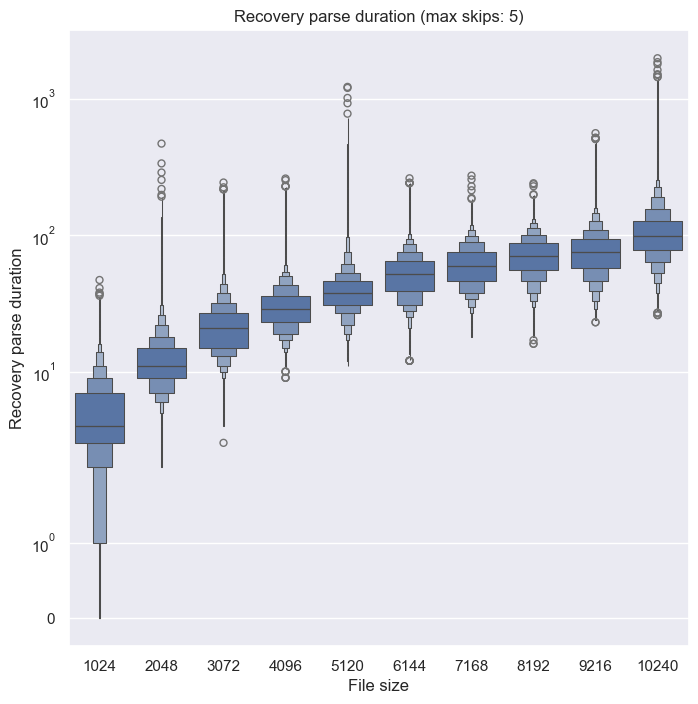

In [ ]:
print(recovered[0]["duration"].describe())

fig1, ax1 = plt.subplots(figsize=(8, 8), sharey=True)
ax1.set_yscale('symlog')

sns.boxenplot(
    data=recovered[0],
    x="bsize", y="duration",
    width_method="exponential",
    ax = ax1
)

#sns.violinplot(
#    data=recovered[2],
#    x="bsize", y="duration",
#    density_norm="width",
#    ax = ax1
#)

ax1.set_title("Recovery parse duration (max skips: " + str(maxSkips[0]) + ")")

ax1.set_xlabel("File size")
ax1.set_ylabel("Recovery parse duration (ms)")


plt.show(fig1)

### Node distribution per file size

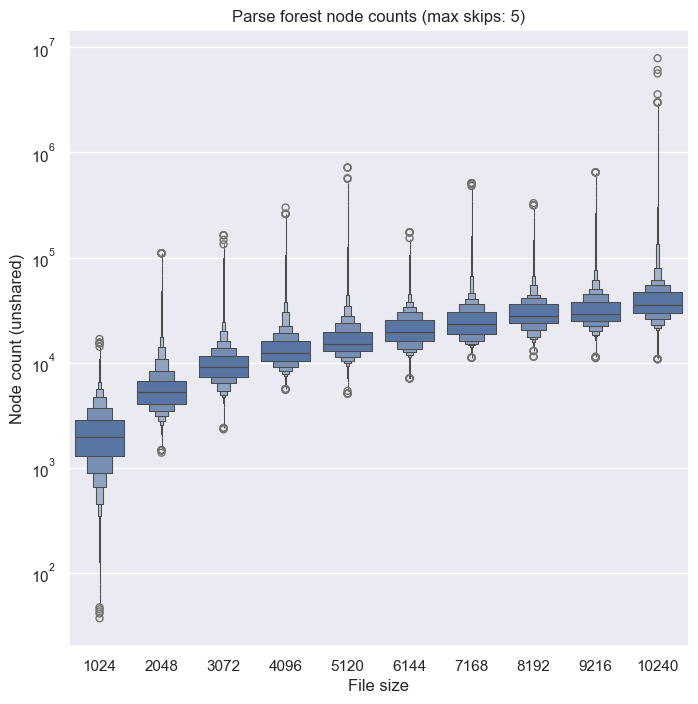

In [ ]:
print(recovered[0]["nodes"].describe())

fig2, ax2 = plt.subplots(figsize=(8, 8), sharey=True)
ax2.set_yscale('symlog')

sns.boxenplot(
    data=recovered[0],
    x="bsize", y="nodes",
    width_method="exponential",
    ax=ax2
)

#sns.violinplot(
#    data=recovered[2],
#    x="bsize", y="nodes",
#    density_norm="width",
#    ax=ax2
#)

ax2.set_title("Parse forest node counts (max skips: " + str(maxSkips[0]) + ")")
ax2.set_xlabel("File size")
ax2.set_ylabel("Node count (unshared)")

plt.show(fig2)

### Parse time ratio vs file size

count    885872.000000
mean        182.544642
std          97.780278
min           0.000000
25%         132.000000
50%         160.000000
75%         204.000000
max        7378.000000
Name: durationRatio, dtype: float64


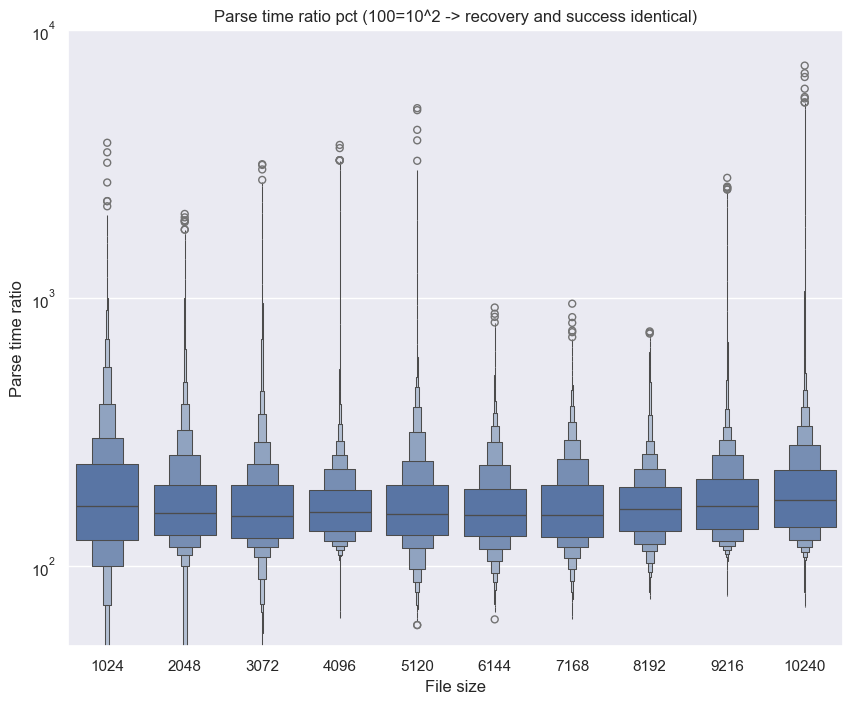

In [ ]:
print(recovered[0]["durationRatio"].describe())

durationRatioFig, durationRatioAx = plt.subplots(figsize=(10, 8))

sns.boxenplot(
    data=recovered[0],
    x="bsize", y="durationRatio",
    width_method="exponential",
    ax=durationRatioAx
)

durationRatioAx.set_yscale('symlog')

durationRatioAx.set_title("Parse time ratio pct (100=10^2 -> recovery and success identical)")
durationRatioAx.set_xlabel("File size")
durationRatioAx.set_ylabel("Parse time ratio")
durationRatioAx.set_ylim(50, 10000)
plt.show(durationRatioFig)


### Node count ratio vs file size

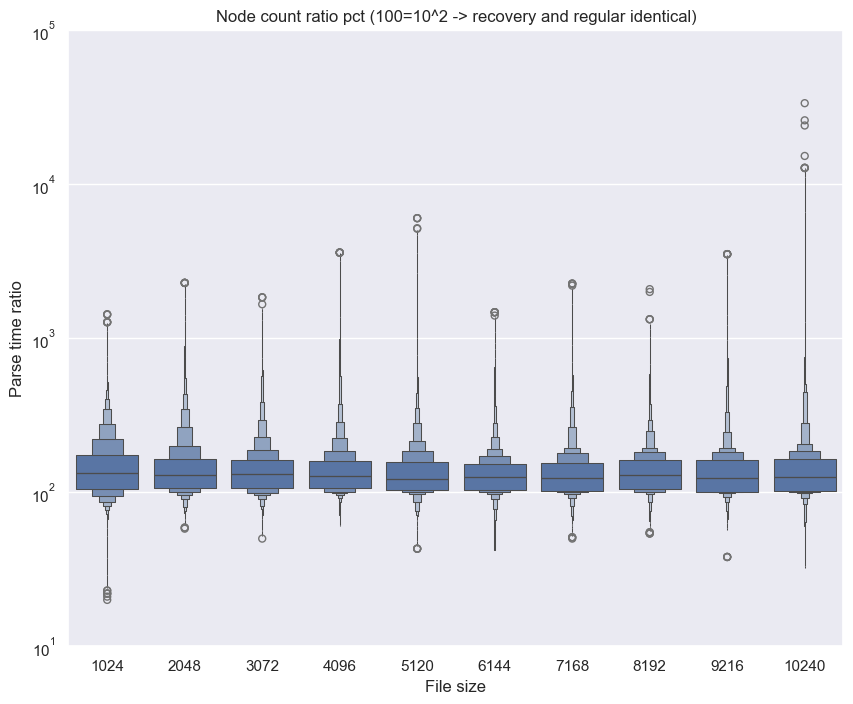

In [ ]:
print(recovered[0]["nodeRatio"].describe())

nodeRatioFig, nodeRatioAx = plt.subplots(figsize=(10, 8))

sns.boxenplot(
    data=recovered[0],
    x="bsize", y="nodeRatio",
    width_method="exponential",
    ax=nodeRatioAx
)

nodeRatioAx.set_yscale('symlog')
nodeRatioAx.set_title("Node count ratio pct (100=10^2 -> recovery and regular identical)")
nodeRatioAx.set_xlabel("File size")
nodeRatioAx.set_ylabel("Parse time ratio")
nodeRatioAx.set_ylim(10, 100000)

plt.show(nodeRatioFig)

